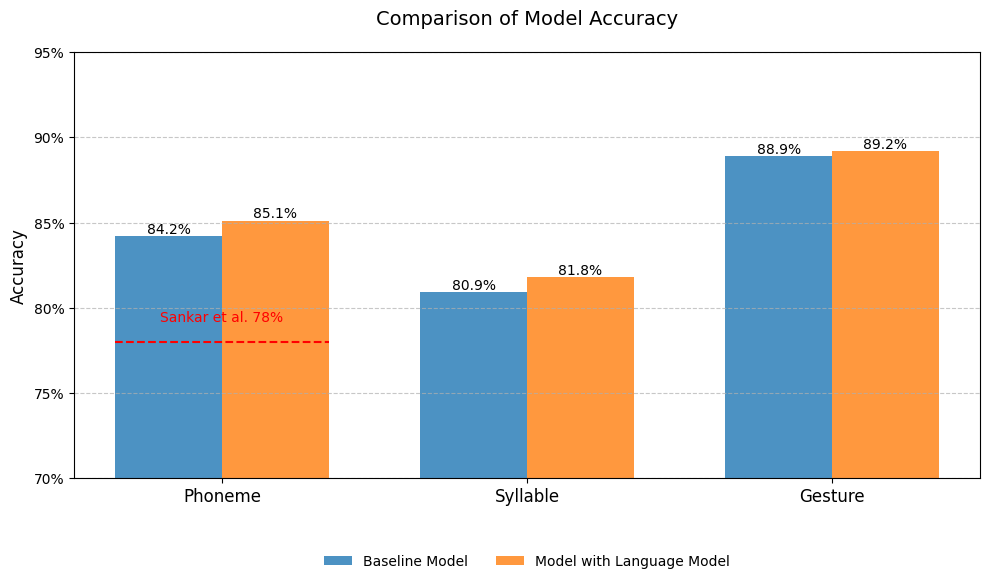

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Phoneme', 'Syllable', 'Gesture']
baseline_accuracies = [0.842, 0.809, 0.889]
lm_accuracies = [0.851, 0.818, 0.892]
colors = ['#1f77b4', '#ff7f0e']  # Colors for baseline and LM models
sota_phoneme = 0.78

# Set up the bar positions
bar_width = 0.35  # Width of each bar
x = np.arange(len(categories))  # x-axis positions for the groups

# Create figure
plt.figure(figsize=(10, 6))

# Plot bars for baseline and LM models
bars_baseline = plt.bar(x - bar_width/2, baseline_accuracies, width=bar_width, color=colors[0], label='Baseline Model', alpha=0.8)
bars_lm = plt.bar(x + bar_width/2, lm_accuracies, width=bar_width, color=colors[1], label='Model with Language Model', alpha=0.8)

# Add SOTA benchmark line for Phoneme only
x_phoneme = x[0]  # x position of Phoneme group
plt.plot([x_phoneme - bar_width, x_phoneme + bar_width], 
         [sota_phoneme, sota_phoneme],
         color='red', linestyle='--', linewidth=1.5)

# Add SOTA label
plt.text(x_phoneme, sota_phoneme + 0.01, f'Sankar et al. {sota_phoneme*100:.0f}%', 
         color='red', ha='center', va='bottom', fontsize=10)

# Add value labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2.,
            height,
            f'{height*100:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

add_labels(bars_baseline)
add_labels(bars_lm)

# Customize plot
plt.title('Comparison of Model Accuracy', fontsize=14, pad=20)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(x, categories, fontsize=12)  # Set x-axis labels
plt.ylim(0.7, 0.95)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis
plt.yticks(np.arange(0.7, 0.96, 0.05), [f'{x*100:.0f}%' for x in np.arange(0.7, 0.96, 0.05)])

# Add legend
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False,
    fontsize=10,
    title_fontsize=12
)

# Ensure layout fits properly
plt.tight_layout()
plt.show()

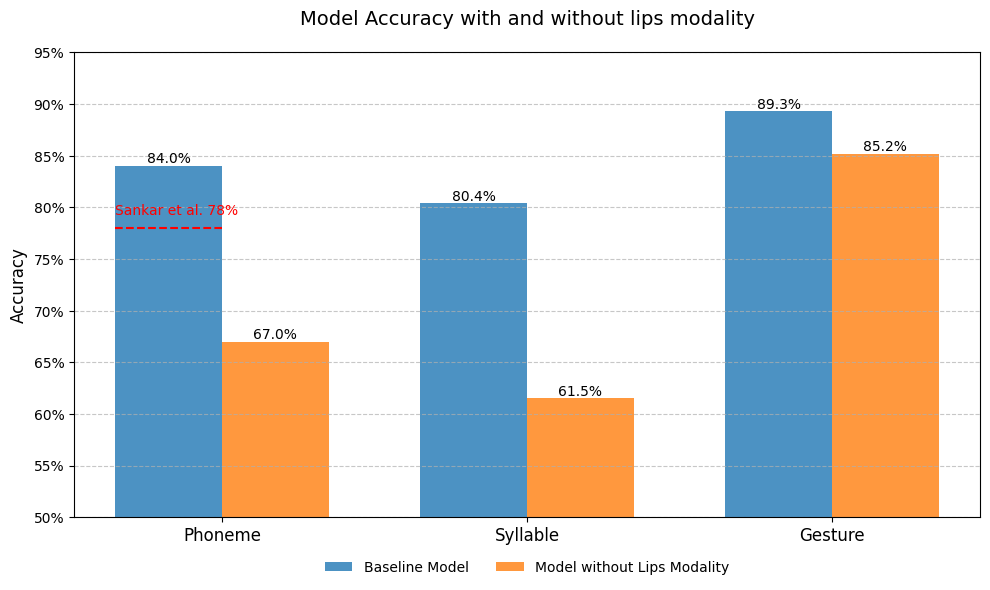

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Categories remain in the order: Phoneme, Syllable, Gesture
categories = ['Phoneme', 'Syllable', 'Gesture']

# Baseline model accuracies (same as before)
baseline = [0.842, 0.809, 0.889]

# New model (without lips modality) accuracies:
# Provided scores: syllables: 0.615, gestures: 0.852, phoneme: 0.67
# Rearranged in the same order as categories: Phoneme, Syllable, Gesture
no_lips = [0.67, 0.615, 0.852]

# Colors for the two models
colors = {
    'Baseline': '#1f77b4',       # Blue for baseline
    'No Lips': '#ff7f0e'         # Orange for model without lips
}

# SOTA benchmark for Phoneme (only for baseline model)
sota_phoneme = 0.78

# Set up bar positions
bar_width = 0.35                   # Width of each bar
x = np.arange(len(categories))     # x-axis positions for the groups

# Create figure
plt.figure(figsize=(10, 6))

# Plot bars for baseline model (shifted left) and model without lips (shifted right)
bars_baseline = plt.bar(x - bar_width/2, baseline, width=bar_width, color=colors['Baseline'],
                        label='Baseline Model', alpha=0.8)
bars_no_lips = plt.bar(x + bar_width/2, no_lips, width=bar_width, color=colors['No Lips'],
                       label='Model without Lips Modality', alpha=0.8)

# Add SOTA benchmark line for Phoneme on the baseline model only.
# x position for Phoneme group is x[0]
x_phoneme = x[0]
plt.plot([x_phoneme - bar_width, x_phoneme],
         [sota_phoneme, sota_phoneme],
         color='red', linestyle='--', linewidth=1.5)

# Add SOTA label for baseline (Phoneme only)
plt.text(x_phoneme - 0.15, sota_phoneme + 0.01, f'Sankar et al. {sota_phoneme*100:.0f}%',
         color='red', ha='center', va='bottom', fontsize=10)

# Function to add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2.,
            height,
            f'{height*100:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

add_labels(bars_baseline)
add_labels(bars_no_lips)

# Customize the plot
plt.title('Model Accuracy with and without lips modality', fontsize=14, pad=20)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(x, categories, fontsize=12)
plt.ylim(0.7, 0.95)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(np.arange(0.5, 0.96, 0.05), [f'{val*100:.0f}%' for val in np.arange(0.5, 0.96, 0.05)])

# Place legend below the plot
plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False,
    fontsize=10,
    title_fontsize=12
)

plt.tight_layout()
plt.show()


In [5]:
import wandb

# Log in to W&B
wandb.login(key="580ab03d7111ed25410f9831b06b544b5f5178a2")
api = wandb.Api()

# Specify the project path and run ID
project_path = "boubacar-sow/ipa-syllable-prediction"
run_id = "ir9ayakr"  # Replace with your actual run ID

# Fetch the specific run
run = api.run(f"{project_path}/{run_id}")

# Get the history of logged metrics
history = run.history()

# Display the first few rows of the DataFrame
print(history.head())

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /pasteur/appa/homes/bsow/.netrc


   _step   val_acc  train_acc  val_top10_acc  train_top10_acc  train_loss  \
0      0  0.400297   0.276186       0.715518         0.578155    3.460708   
1      1  0.427262   0.353415       0.750438         0.666132    2.984407   
2      2  0.441958   0.367224       0.764325         0.681028    2.895446   
3      3  0.451530   0.374478       0.769853         0.688726    2.850021   
4      4  0.460429   0.379334       0.775920         0.693475    2.820790   

     _runtime  val_top5_acc  perplexity    _timestamp  val_loss  
0  153.062011      0.626668   14.666524  1.740842e+09  2.685568  
1  304.618871      0.661858   12.198555  1.740842e+09  2.501317  
2  455.172838      0.681138   11.205682  1.740843e+09  2.416421  
3  605.767930      0.686126   10.617591  1.740843e+09  2.362512  
4  756.361486      0.698665   10.274896  1.740843e+09  2.329703  


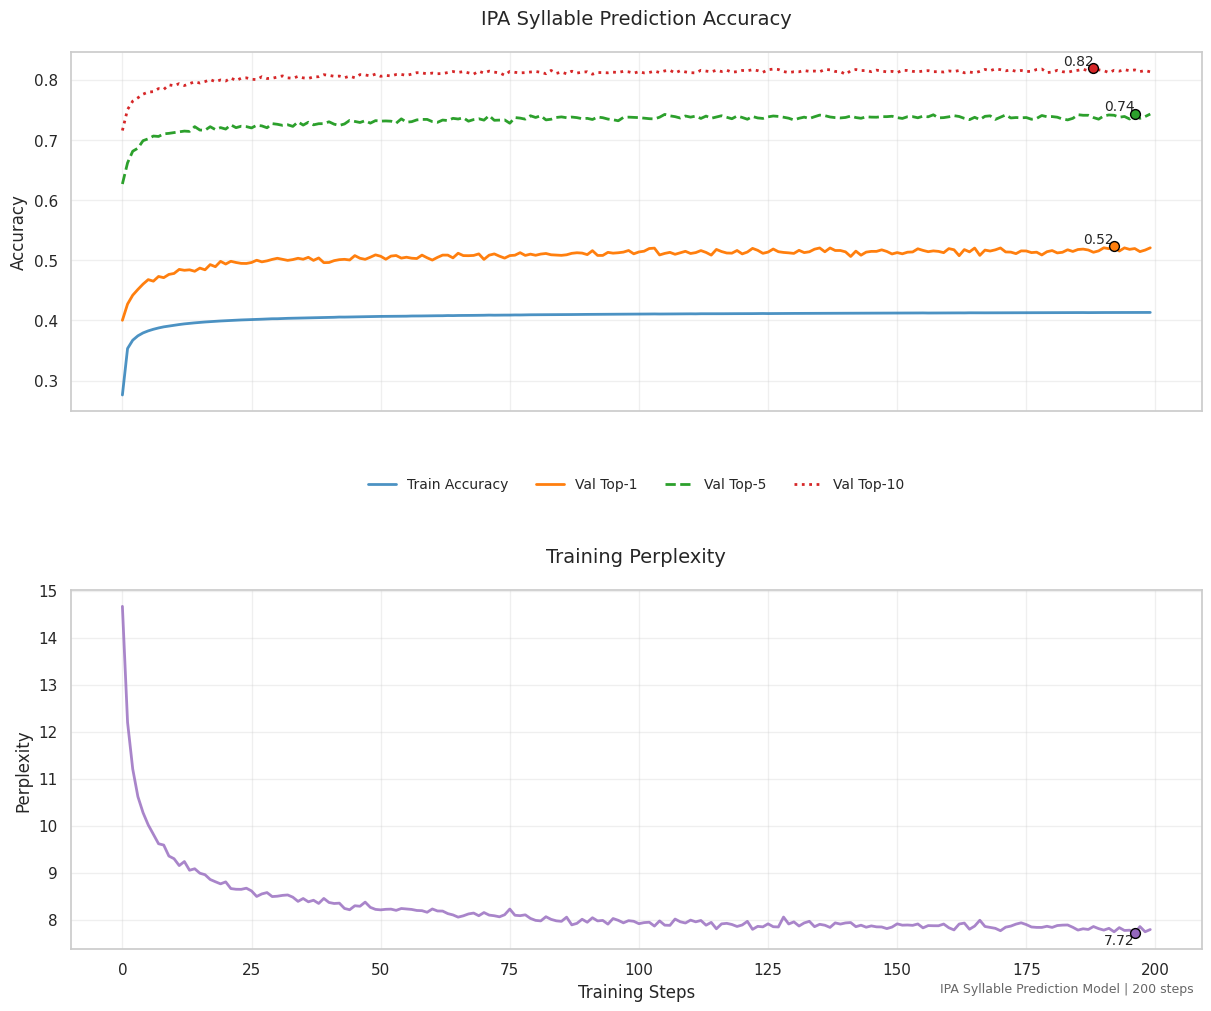

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the full history data
history = run.history()

# Set up professional styling
sns.set(style="whitegrid", context="notebook", palette="colorblind")
plt.rcParams['font.family'] = 'DejaVu Sans'  # Good for linguistic symbols
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Create figure with constrained layout
fig, axs = plt.subplots(2, 1, figsize=(12, 10), 
                        sharex=True, 
                        gridspec_kw={'hspace': 0.1},
                        constrained_layout=True)

# Define a consistent color palette
palette = {
    'train': '#1f77b4',
    'val_top1': '#ff7f0e',
    'val_top5': '#2ca02c',
    'val_top10': '#d62728',
    'perplexity': '#9467bd'
}

# Accuracy Plot ---------------------------------------------------------------
ax = axs[0]
# Training accuracy
ax.plot(history['_step'], history['train_acc'], 
        label='Train Accuracy', 
        color=palette['train'],
        linewidth=2,
        alpha=0.8)

# Validation accuracies
ax.plot(history['_step'], history['val_acc'], 
        label='Val Top-1', 
        color=palette['val_top1'],
        linewidth=2)

ax.plot(history['_step'], history['val_top5_acc'], 
        label='Val Top-5', 
        color=palette['val_top5'],
        linewidth=2,
        linestyle='--')

ax.plot(history['_step'], history['val_top10_acc'], 
        label='Val Top-10', 
        color=palette['val_top10'],
        linewidth=2,
        linestyle=':')

# Annotate best values
for metric, color in [('val_acc', palette['val_top1']),
                     ('val_top5_acc', palette['val_top5']),
                     ('val_top10_acc', palette['val_top10'])]:
    best_idx = np.argmax(history[metric])
    ax.scatter(history['_step'][best_idx], history[metric][best_idx],
              color=color, zorder=5, s=50, edgecolor='black')
    ax.text(history['_step'][best_idx], history[metric][best_idx],
           f'{history[metric][best_idx]:.2f}',
           ha='right', va='bottom', fontsize=10)

ax.set_title('IPA Syllable Prediction Accuracy', pad=20)
ax.set_ylabel('Accuracy')
ax.grid(True, alpha=0.3)

# Place legend below the plot (adjusting bbox may not be necessary with constrained layout)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
         ncol=4, frameon=False, fontsize=10)

# Perplexity Plot -------------------------------------------------------------
ax = axs[1]
ax.plot(history['_step'], history['perplexity'], 
       color=palette['perplexity'],
       linewidth=2,
       alpha=0.8)

# Log scale if perplexity spans orders of magnitude
if np.max(history['perplexity']) > 10 * np.min(history['perplexity']):
    ax.set_yscale('log')
    ax.set_ylabel('Perplexity (log scale)')
else:
    ax.set_ylabel('Perplexity')

# Highlight minimum perplexity
min_idx = np.argmin(history['perplexity'])
ax.scatter(history['_step'][min_idx], history['perplexity'][min_idx],
          color=palette['perplexity'], 
          zorder=5, s=50, edgecolor='black')
ax.text(history['_step'][min_idx], history['perplexity'][min_idx],
       f'{history["perplexity"][min_idx]:.2f}',
       ha='right', va='top', fontsize=10)

ax.set_title('Training Perplexity', pad=20)
ax.set_xlabel('Training Steps')
ax.grid(True, alpha=0.3)

# Add model information annotation
fig.text(0.99, 0.01, 
        f"IPA Syllable Prediction Model | {len(history)} steps",
        ha='right', va='bottom', alpha=0.7, fontsize=9)

plt.savefig('ipa_syllable_training.png', dpi=300, bbox_inches='tight')
plt.show()


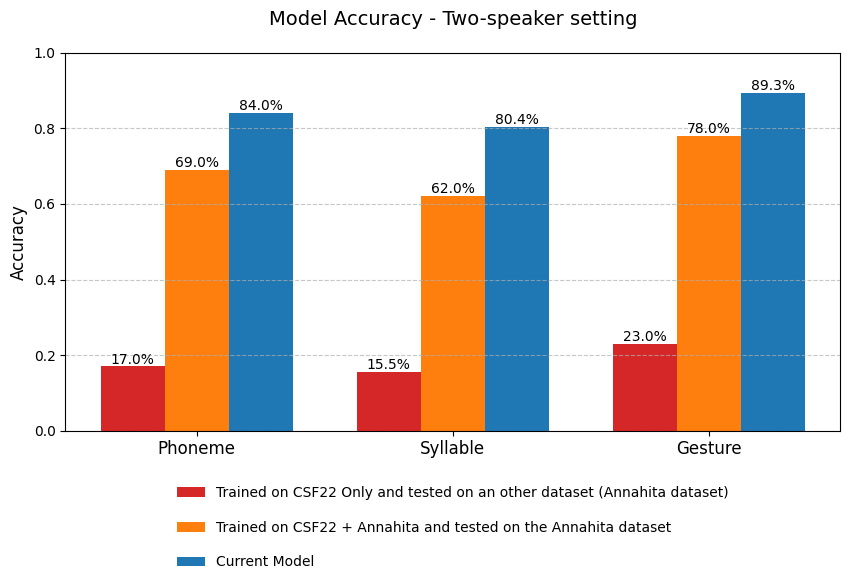

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Categories
categories = ['Phoneme', 'Syllable', 'Gesture']

# Data for each evaluation scenario:
# Order of values corresponds to categories: Phoneme, Syllable, Gesture
baseline = [0.17, 0.155, 0.23]           # Evaluating model trained on CSF22 only (no retraining)
both_datasets = [0.69, 0.62, 0.78]         # Evaluating model trained on CSF22 + Annahita (test on Annahita test set)
current_model = [0.842, 0.809, 0.889]   # Current model accuracy

# Define colors for each scenario
colors = {
    'CSF22 Only': '#d62728',       # Red
    'CSF22 + Annahita': '#ff7f0e',   # Orange
    'Current Model': '#1f77b4'       # Blue
}

# Set width for each bar and positions for groups
bar_width = 0.25
x = np.arange(len(categories))

# Create figure
plt.figure(figsize=(10, 6))

# Plot bars for each scenario
bar1 = plt.bar(x - bar_width, baseline, width=bar_width, color=colors['CSF22 Only'],
               label='Trained on CSF22 Only and tested on an other dataset (Annahita dataset)')
bar2 = plt.bar(x, both_datasets, width=bar_width, color=colors['CSF22 + Annahita'],
               label='Trained on CSF22 + Annahita and tested on the Annahita dataset')
bar3 = plt.bar(x + bar_width, current_model, width=bar_width, color=colors['Current Model'],
               label='Current Model')

# Add data labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.,
            height,
            f'{height*100:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Customize the plot
plt.title('Model Accuracy - Two-speaker setting', fontsize=14, pad=20)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(x, categories, fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend below the plot
plt.legend(
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.4),  # Move below the plot
    ncol=1,                     # Stack legend items vertically
    frameon=False, 
    fontsize=10,
    labelspacing=1.5
)

# Adjust layout to make room for the legend at the bottom
plt.subplots_adjust(bottom=0.25)

plt.show()
